In [74]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Q1. Import the cifar10 dataset from ‘keras.datasets’. Perform all the data preprocessing required

In [75]:
from keras.datasets import cifar10

In [76]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [77]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [78]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [79]:
x_train.dtype

dtype('float64')

In [80]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [81]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [82]:
unique_num= len(np.unique(y_train))

In [83]:
unique_num

10

In [84]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [85]:
y_train= to_categorical(y_train,unique_num)
y_test=to_categorical(y_test,unique_num)

In [86]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [87]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [88]:
print(y_valid.shape)
print(x_valid.shape)

(5000, 10)
(5000, 32, 32, 3)


## Q2. Build a CNN architecture with Keras and stack an ANN on top of CNN

In [89]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [90]:
model=Sequential()

In [91]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [92]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [93]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 16)        

In [95]:
model.add(Flatten())

In [96]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 16)        

In [97]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [98]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [99]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [100]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 16)        

In [102]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 38s - loss: 2.1014 - accuracy: 0.1655 - val_loss: 1.9851 - val_accuracy: 0.1728 - 38s/epoch - 418ms/step
Epoch 2/10
90/90 - 34s - loss: 1.8940 - accuracy: 0.2374 - val_loss: 1.8434 - val_accuracy: 0.2842 - 34s/epoch - 374ms/step
Epoch 3/10
90/90 - 32s - loss: 1.7716 - accuracy: 0.3030 - val_loss: 1.7064 - val_accuracy: 0.3256 - 32s/epoch - 359ms/step
Epoch 4/10
90/90 - 35s - loss: 1.6748 - accuracy: 0.3524 - val_loss: 1.6561 - val_accuracy: 0.3694 - 35s/epoch - 387ms/step
Epoch 5/10
90/90 - 32s - loss: 1.6115 - accuracy: 0.3862 - val_loss: 1.6145 - val_accuracy: 0.3952 - 32s/epoch - 360ms/step
Epoch 6/10
90/90 - 33s - loss: 1.5384 - accuracy: 0.4204 - val_loss: 1.5151 - val_accuracy: 0.4304 - 33s/epoch - 371ms/step
Epoch 7/10
90/90 - 34s - loss: 1.4911 - accuracy: 0.4402 - val_loss: 1.4891 - val_accuracy: 0.4394 - 34s/epoch - 381ms/step
Epoch 8/10
90/90 - 32s - loss: 1.4424 - accuracy: 0.4638 - val_loss: 1.4287 - val_accuracy: 0.4784 - 32s/epoch - 360ms/step
Epoch 9/

## Q3. Fit and evaluate the model. Plot the training and validation curves.

In [103]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.3424 - accuracy: 0.5102


In [104]:
results

[1.3424248695373535, 0.510200023651123]

In [105]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

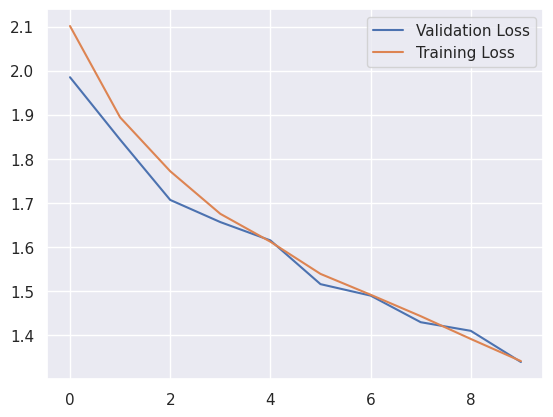

In [106]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

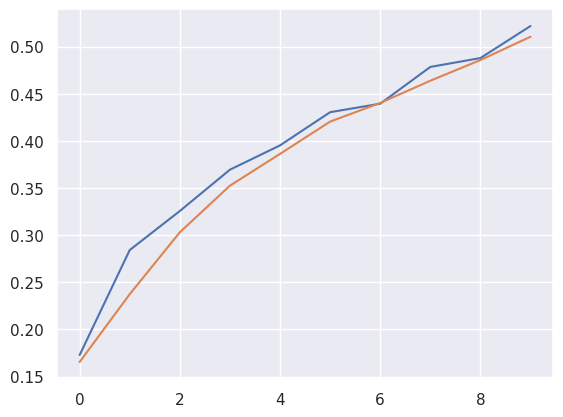

In [107]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;